In [1]:
library(igraph)
library(RColorBrewer)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



ERROR: Error in library(RColorBrewer): there is no package called ‘RColorBrewer’


## 1 Stock Market

In this part of the project, we study data from stock market. The data is available on this Dropbox Link. The goal of this part is to study correlation structures among fluctuation patterns of stock prices using tools from graph theory. The intuition is that investors will have similar strategies of investment for stocks that are effected by the same economic factors. For example, the stocks belonging the transportation sector may have different absolute prices, but if for example fuel prices change or are expected to change significantly in the near future, then you would expect the investors to buy or sell all stocks similarly and maximize their returns. Towards that goal, we construct different graphs based on similarities among the time series of returns on different stocks at different time scales (day vs a week). Then, we study properties of such graphs. The data is obtained from Yahoo Finance website for 3 years. You’re provided with a number of csv tables, each containing several fields: Date, Open, High, Low, Close, Volume, and Adj Close price. The files are named according to Ticker Symbol of each stock. You may find the market sector for each company in Name_sector.csv.

### 1.1 Return correlation
- **Question 1:** Provide an upper and lower bound on ij . Also, provide a justification for using log-normalized return (ri(t)) instead of regular return (qi(t)).

### 1.2 Constructing correlation graphs
- **Question 2:** Plot the degree distribution of the correlation graph and a histogram showing the un-normalized distribution of edge weights.

In [47]:
edgeList <- read.csv(file="weight1.csv", header=TRUE, sep=",")
cor_max <- as.matrix(edgeList)

In [49]:
cast_g <- graph_from_adjacency_matrix(cor_max, weighted = TRUE, mode = 'undirected')

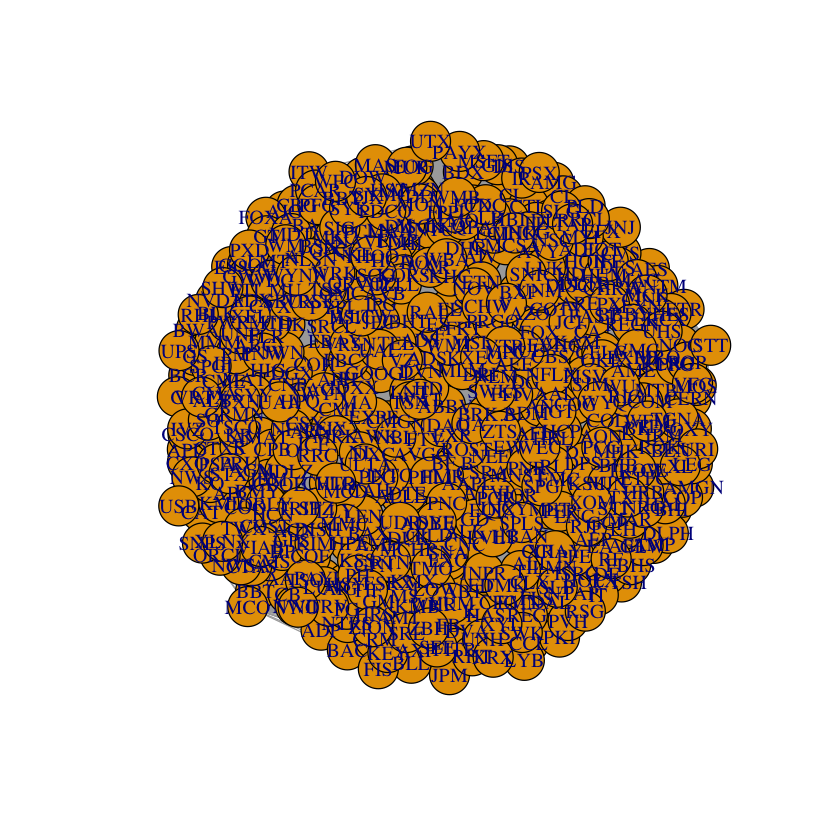

In [50]:
plot(cast_g)

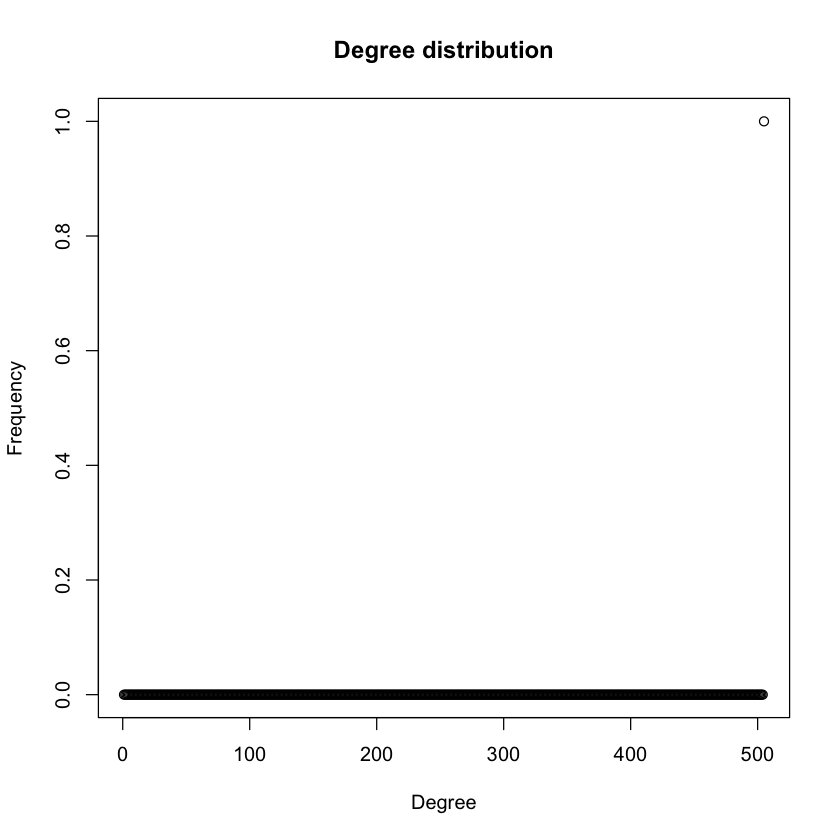

In [51]:
plot(degree.distribution(cast_g), xlab="Degree",ylab="Frequency",
         main=paste0("Degree distribution"))

In [52]:
v = as.vector(unlist(edgeList))

In [53]:
print(max(v))
print(min(v))

[1] 1.534788
[1] 0


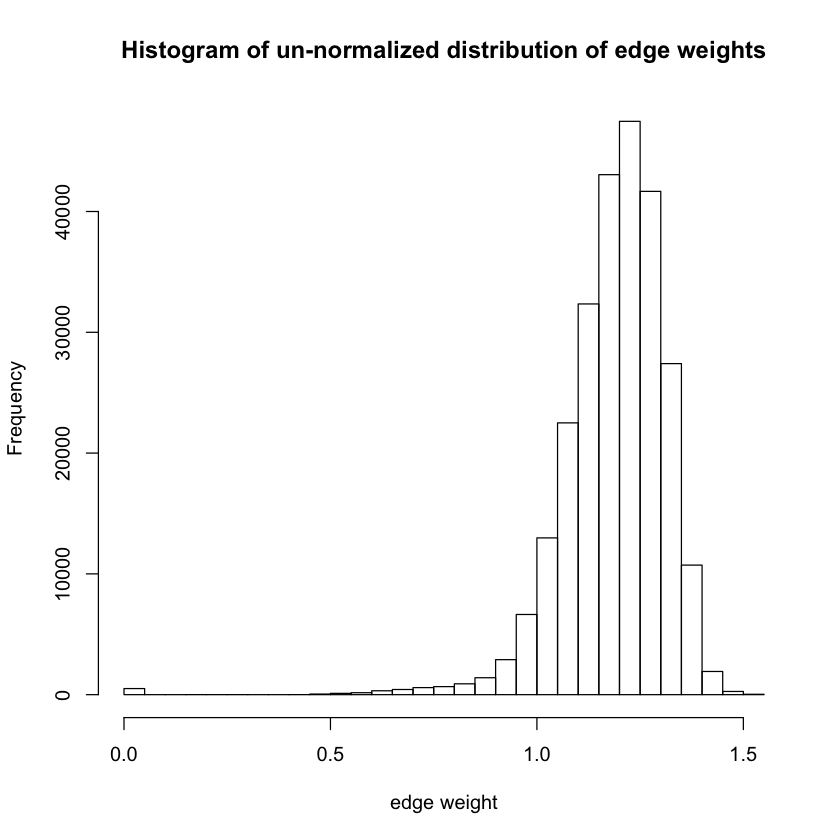

In [55]:
hist(v, main = 'Histogram of un-normalized distribution of edge weights', xlab = 'edge weight', breaks = 50)

- **Question 3:** Extract the MST of the correlation graph. Each stock can be categorized into a sector, which can be found in Name_sector.csv file. Plot the MST and color-code the nodes based on sectors. Do you see any pattern in the MST? The structures that you find in MST are called Vine clusters. Provide a detailed explanation about the pattern you observe.

In [78]:
m_s_t <- mst(cast_g)

In [79]:
m_s_t

IGRAPH 75d3893 UNW- 505 504 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 75d3893 (vertex names):
 [1] A   --TMO   AAL --DAL   AAP --ORLY  AAPL--UNP   ABBV--AMGN  ABC --CAH  
 [7] ABT --CERN  ABT --HOLX  ABT --MDT   ABT --TMO   ABT --VAR   ACN --CTSH 
[13] ACN --FISV  ACN --RHT   ADBE--CRM   ADBE--INTU  ADI --TXN   ADI --XLNX 
[19] ADM --PFG   ADP --PAYX  ADS --DFS   ADS --EBAY  ADSK--MCO   AEE --XEL  
[25] AEP --DUK   AEP --ETR   AEP --FE    AEP --PPL   AEP --XEL   AES --CNP  
[31] AES --NRG   AET --ANTM  AET --CNC   AET --HUM   AET --UNH   AFL --PFG  
[37] AGN --AMGN  AGN --MYL   AIG --JPM   AIV --REG   AIV --UDR   AIZ --BRK.B
[43] AIZ --HRL   AJG --MMC   AJG --WLTW  AKAM--TEL   ALB --EMN   ALK --DAL  
+ ... omitted several edges

In [60]:
name_sector <- read.csv(file='finance_data/Name_sector.csv', header=TRUE, sep=",")

In [70]:
coul = brewer.pal(nlevels(as.factor(name_sector$Sector)), "Set3")
my_color=coul[as.numeric(as.factor(name_sector$Sector))]

In [71]:
coul

[1] "#8DD3C7" "#FFFFB3" "#BEBADA" "#FB8072" "#80B1D3" "#FDB462" "#B3DE69"
 [8] "#FCCDE5" "#D9D9D9" "#BC80BD" "#CCEBC5"

In [85]:
m_s_t$Vertice

NULL

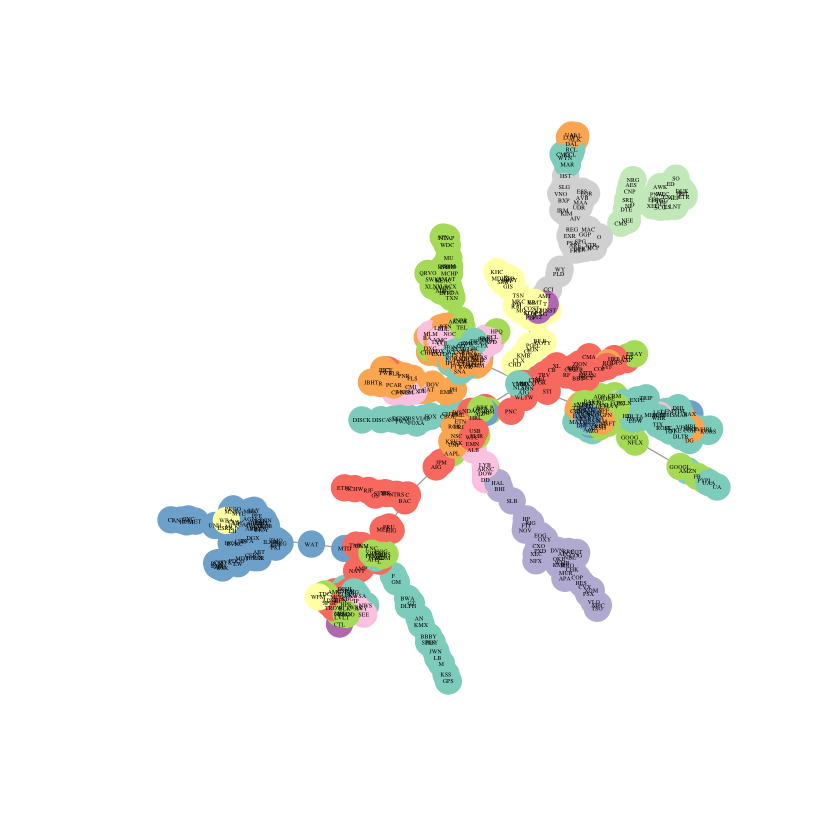

In [90]:
set.seed(4)
plot(m_s_t, 
    vertex.size=10,
    vertex.color=my_color, 
    vertex.label.cex=0.3,
    vertex.label.color="Black",
    vertex.frame.color="transparent")

- **Question 4:** Report the value of alpha for the above two cases and provide an interpretation for the difference.

Method 1

In [122]:
N <- matrix(0, nrow = 1, ncol = 505)

In [123]:
N[1]

[1] 0

In [135]:
a = name_sector$Sector[name_sector$Symbol == 'A']

In [139]:
b = name_sector$Sector[name_sector$Symbol == 'AAL']

In [142]:
a == b

[1] FALSE

In [143]:
# For each node, calculate Si
#vertex3 = V(m_s_t)[which(V(m_s_t)$name == 321465)]
N <- matrix(0, nrow = 1, ncol = 505)
Q <- matrix(0, nrow = 1, ncol = 505)
i <- 1
for (vertex in name_sector$Symbol){
    a = name_sector$Sector[name_sector$Symbol == vertex]
    neighbors = neighbors(m_s_t, vertex)
    N[i] = length(names(neighbors))
    sum = 0
    for (neighbor in names(neighbors)){
        b = name_sector$Sector[name_sector$Symbol == neighbor]
        if (a == b){
            sum = sum + 1
        }
    }
    Q[i] = sum
    i = i + 1
    }

In [151]:
alpha1 = sum(Q / N) / V

In [154]:
alpha1

[1] 0.8450043

Method 2

In [108]:
# The following results are cited from python code
#Consumer Discretionary        85
#Consumer Staples              37
#Energy                        34
#Financials                    66
#Health Care                   60
#Industrials                   65
#Information Technology        70
#Materials                     25
#Real Estate                   31
#Telecommunication Services     4
#Utilities                     28

In [101]:
# V is the total number of stocks
V = length(name_sector$Symbol)

In [102]:
# S is the number of nodes for each sector
S <- c(85, 37, 34, 66, 60, 65, 70, 25, 31, 4, 28)

In [106]:
# For each stock
alpha2 = sum(S^2) / V^2
print(alpha2)

[1] 0.1145652


- **Question 5:** Extract the MST from the correlation graph based on weekly data. Compare the pattern of this MST with the pattern of the MST found in question 3.

In [155]:
edgeList_weekly <- read.csv(file="weight_weekly.csv", header=TRUE, sep=",")
cor_max_weekly <- as.matrix(edgeList_weekly)
cast_g_weekly <- graph_from_adjacency_matrix(cor_max_weekly, weighted = TRUE, mode = 'undirected')

In [157]:
m_s_t_weekly <- mst(cast_g_weekly)

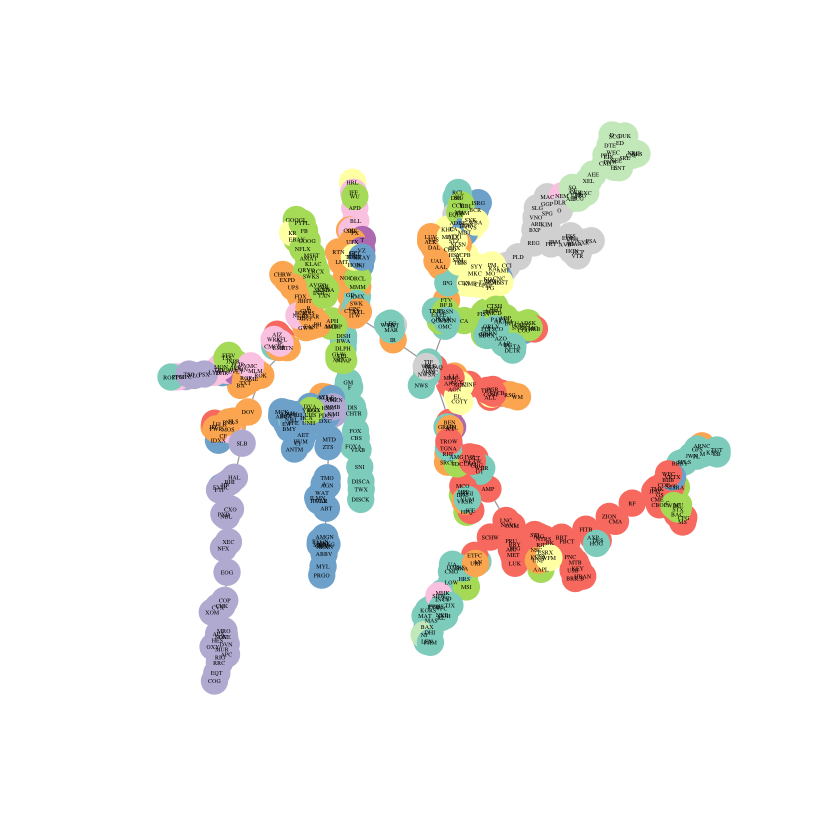

In [160]:
set.seed(4)
plot(m_s_t_weekly, 
    vertex.size=10,
    vertex.color=my_color, 
    vertex.label.cex=0.3,
    vertex.label.color="Black",
    vertex.frame.color="transparent")